In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

In [2]:
#Importing data
link = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(link, delimiter=",")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.dropna()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Extract the features and target of the data. The target is the Outcome
x = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [5]:
#Normalize the features
from sklearn.preprocessing import normalize
x_normalized = normalize(x)
data_normalized = pd.DataFrame(x_normalized, columns = x.columns)
data_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [6]:
#K Means Cluster
from sklearn.cluster import KMeans
kmeans = sklearn.cluster.KMeans(n_clusters = 2)
#Fit data
kmeans.fit(data_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#Perform Silhouette analysis
from sklearn.metrics import silhouette_score
list_score =[]
list_k=[]
for i in range(2, 5):
    cluster = KMeans(n_clusters = i, random_state = 10)
    cluster.fit(data_normalized)
    s = silhouette_score(data_normalized, cluster.labels_)
    list_k.append(i)
    list_score.append(s)
    print('Cluster:', i, 'Silhouette Score:', s)

Cluster: 2 Silhouette Score: 0.5603762181307924
Cluster: 3 Silhouette Score: 0.46037639276878
Cluster: 4 Silhouette Score: 0.47237469494513534


Text(0, 0.5, 'Insulin')

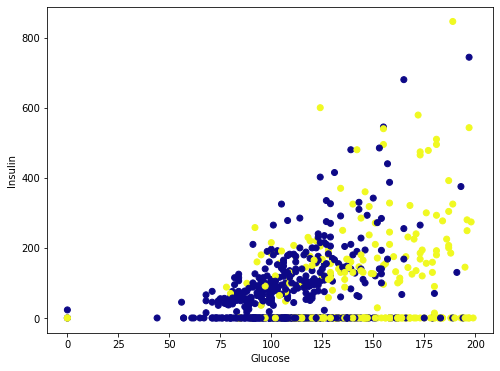

In [14]:
#Plot Insulin vs Glucose and color by the Outcome
plt.figure(figsize = (8, 6))
plt.scatter(x['Glucose'], x['Insulin'], c = y, cmap = 'plasma')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

Text(0, 0.5, 'Insulin')

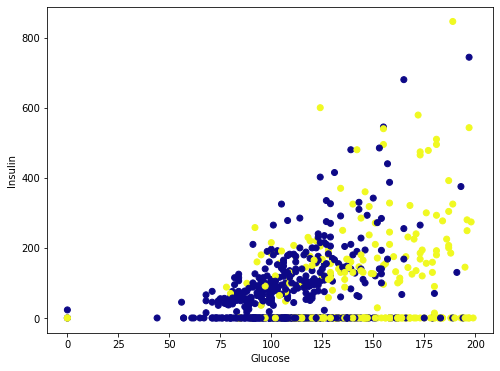

In [20]:
#Plot Insulin vs Glucose and color by the clustering labels
plt.figure(figsize = (8, 6))
plt.scatter(x['Glucose'], x['Insulin'], c = y, cmap = 'plasma')
plt.xlabel('Glucose')
plt.ylabel('Insulin')